In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style='ticks')

In [3]:
df=pd.read_csv("C:/Users/DELL/Desktop/Mukund/DATA SCIENCE/Statistics/Absenteeism_at_work.csv", sep=';')

In [4]:
df.head().style.background_gradient(cmap="Dark2")

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554000,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554000,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554000,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554000,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554000,97,0,1,2,1,0,1,90,172,30,2


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [7]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
#Minimum values 0 replaced with 1
df['Month of absence'].replace(0,1,inplace=True)

In [9]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.328378,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.429397,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
df.skew()

Reason for absence                -0.915312
Month of absence                   0.076528
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='Density'>

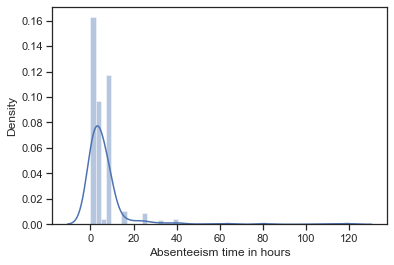

In [11]:
sns.distplot(df['Absenteeism time in hours'])

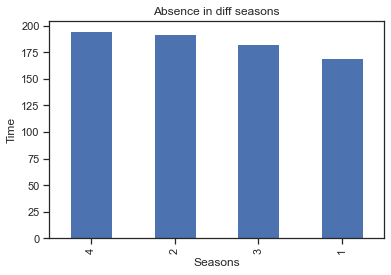

In [12]:
df.Seasons.value_counts().plot(kind='bar')
plt.title("Absence in diff seasons")
plt.xlabel("Seasons")
plt.ylabel("Time")
plt.show()

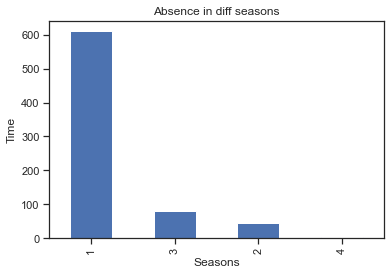

In [13]:
df.Education.value_counts().plot(kind='bar')
plt.title("Absence in diff seasons")
plt.xlabel("Seasons")
plt.ylabel("Time")
plt.show()

In [14]:
### 1 is more highschool ->More absentees

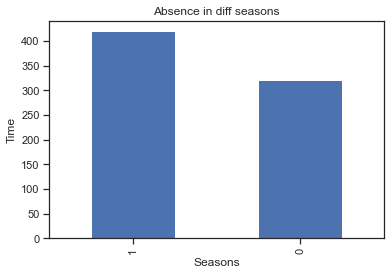

In [15]:
df["Social drinker"].value_counts().plot(kind='bar')
plt.title("Absence in diff seasons")
plt.xlabel("Seasons")
plt.ylabel("Time")
plt.show()

## Social Drinker(1) was more absence

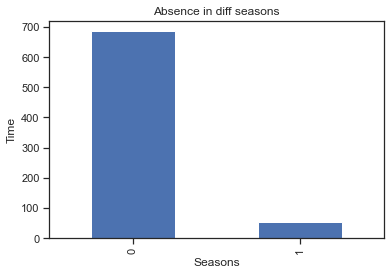

In [16]:
df["Social smoker"].value_counts().plot(kind='bar')
plt.title("Absence in diff seasons")
plt.xlabel("Seasons")
plt.ylabel("Time")
plt.show()
##Not as Social Smoker(0) was more absence

In [17]:
corr=df.corr()

In [18]:
corr['Absenteeism time in hours'].sort_values(ascending=False)

#Not a IDV have correlation with DV

Absenteeism time in hours          1.000000
Height                             0.144420
Son                                0.113756
Age                                0.065760
Social drinker                     0.065067
Transportation expense             0.027585
Hit target                         0.026695
Work load Average/day              0.024749
Month of absence                   0.023779
Service time                       0.019029
Weight                             0.015789
Seasons                           -0.005615
Social smoker                     -0.008936
Pet                               -0.028277
Education                         -0.046235
Body mass index                   -0.049719
Distance from Residence to Work   -0.088363
Disciplinary failure              -0.124248
Day of the week                   -0.124361
Reason for absence                -0.173116
Name: Absenteeism time in hours, dtype: float64

<AxesSubplot:>

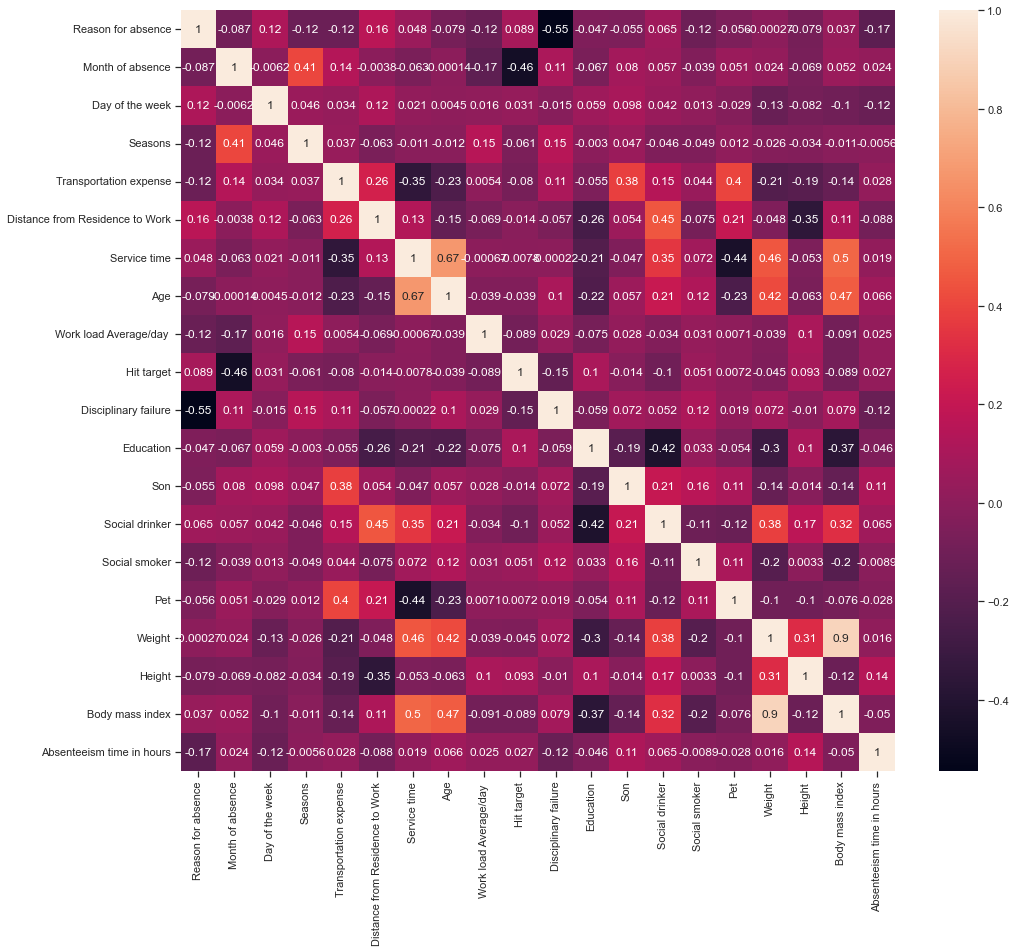

In [19]:
plt.figure(figsize=(16,14))

sns.heatmap(corr,annot=True)


<AxesSubplot:xlabel='Age', ylabel='Absenteeism time in hours'>

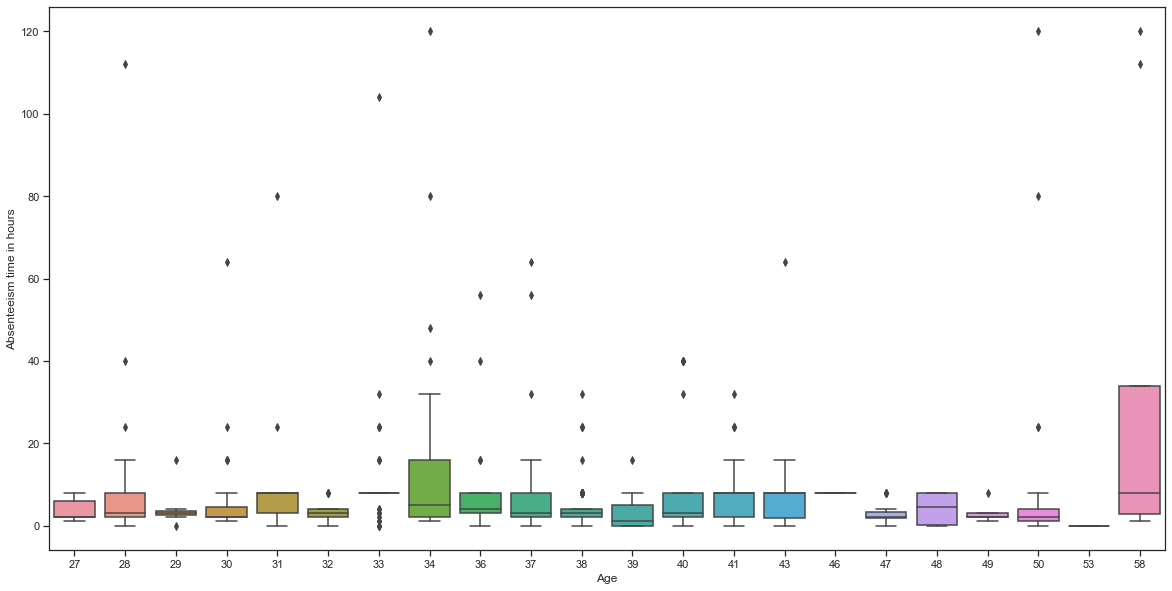

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x="Age",y="Absenteeism time in hours",data=df)

<AxesSubplot:xlabel='Son', ylabel='Absenteeism time in hours'>

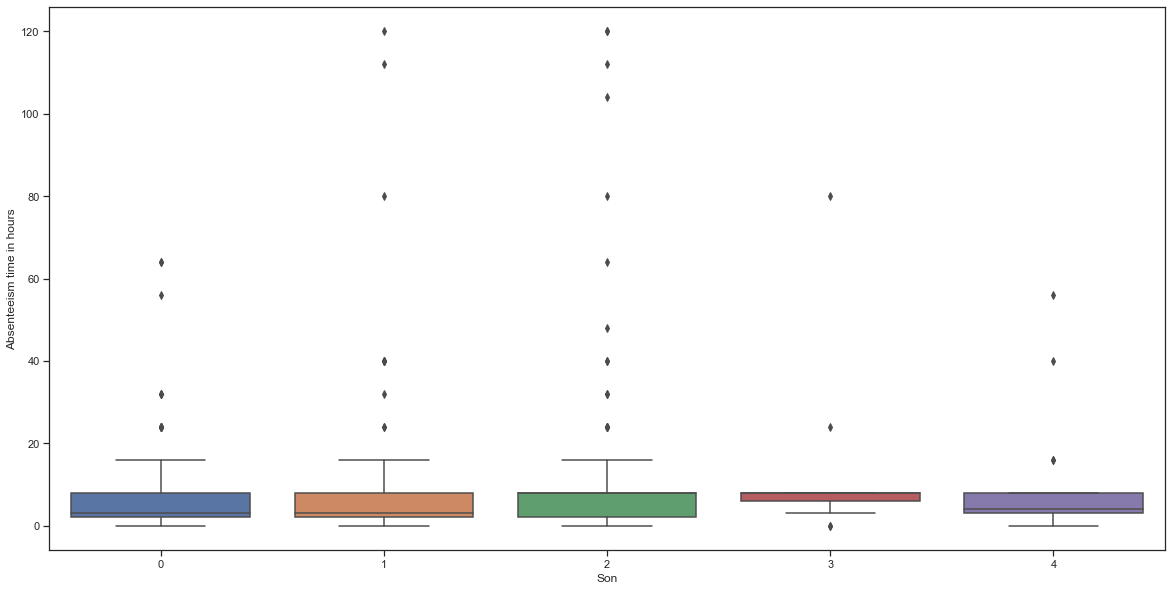

In [21]:
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x="Son",y="Absenteeism time in hours",data=df)

In [48]:
AutoMpg=pd.read_csv("https://raw.githubusercontent.com/Mukund94/Datasets/main/auto-mpg.csv")

In [49]:
AutoMpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Auto mpg> Relnship b/w mpg and other attributes
## DV->MPG

In [24]:
AutoMpg.shape[1]

9

In [25]:
AutoMpg.shape[0]

398

In [26]:
len(AutoMpg.columns)

9

In [27]:
AutoMpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [28]:
AutoMpg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

<AxesSubplot:xlabel='mpg', ylabel='Density'>

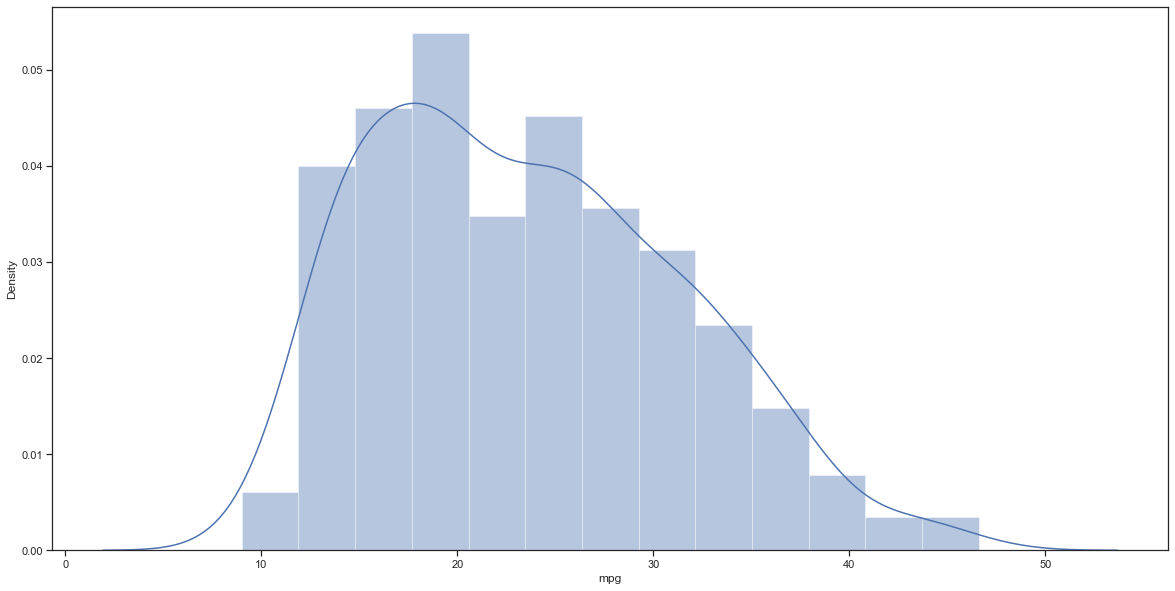

In [29]:
sns.distplot(AutoMpg['mpg'])

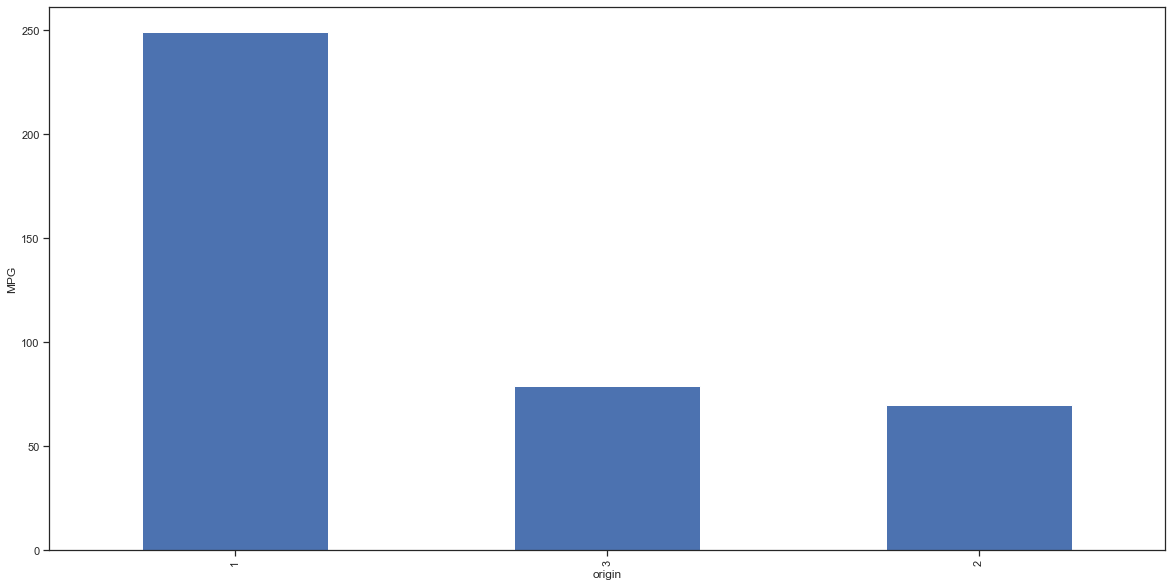

In [30]:
AutoMpg.origin.value_counts().plot(kind='bar')
plt.xlabel("origin")
plt.ylabel("MPG")
plt.show()

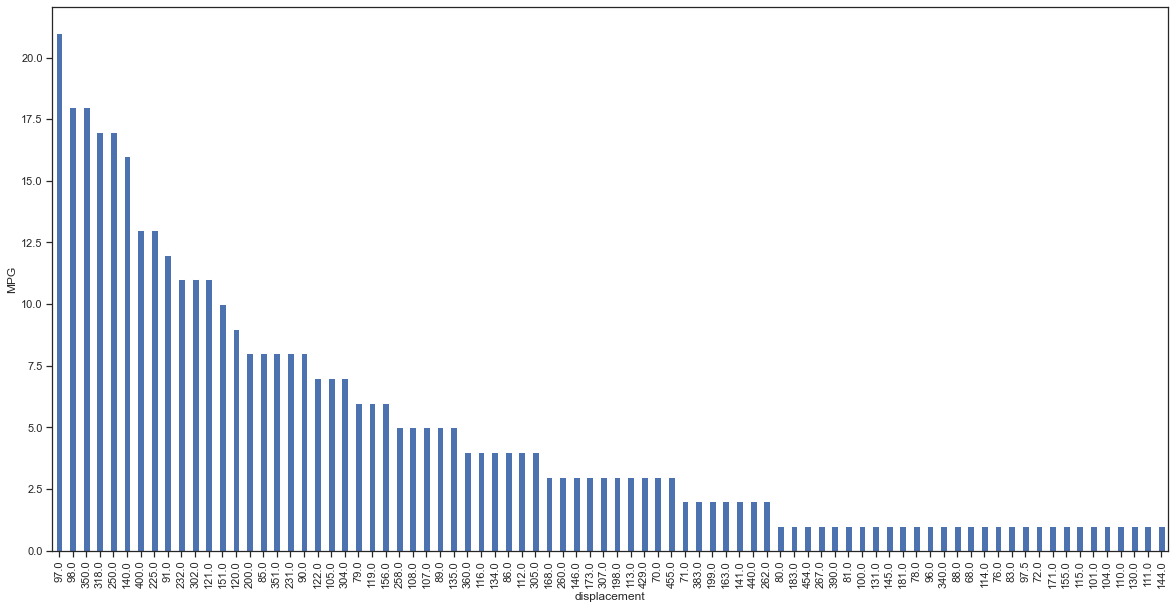

In [31]:
AutoMpg.displacement.value_counts().plot(kind='bar')
plt.xlabel("displacement")
plt.ylabel("MPG")
plt.show()

In [32]:
corr1=AutoMpg.corr()

In [33]:
corr1

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

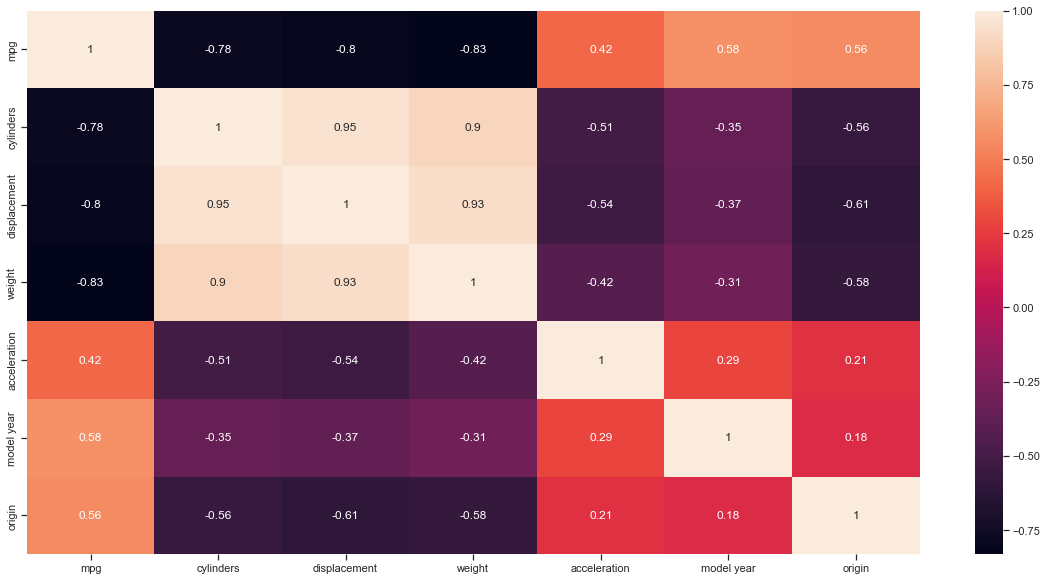

In [34]:
sns.heatmap(corr1,annot=True)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

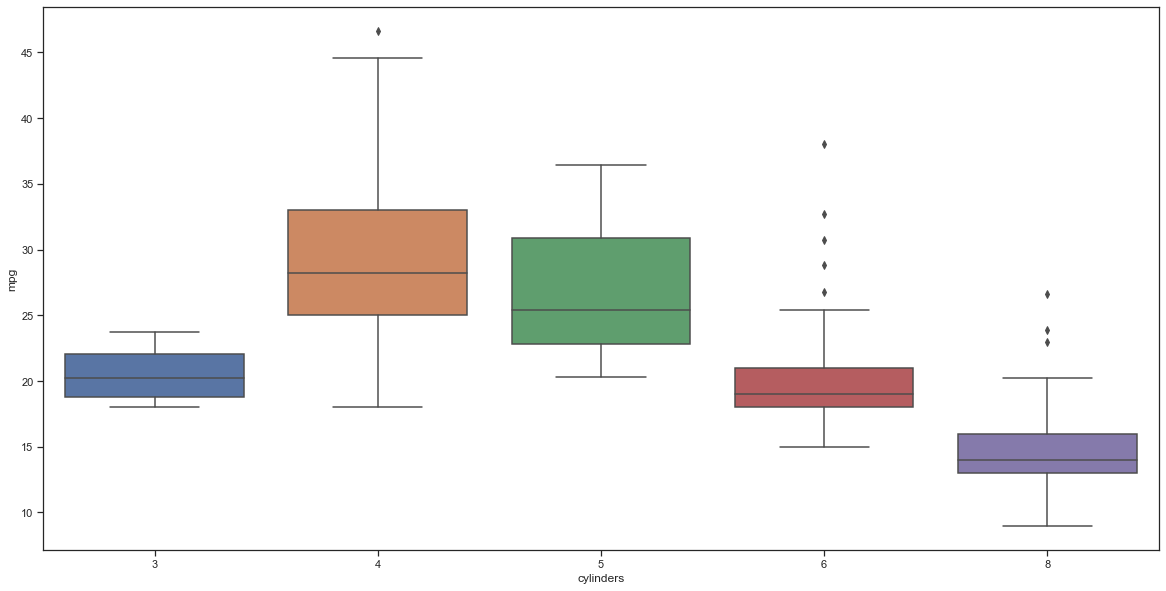

In [35]:
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x="cylinders",y="mpg",data=AutoMpg)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

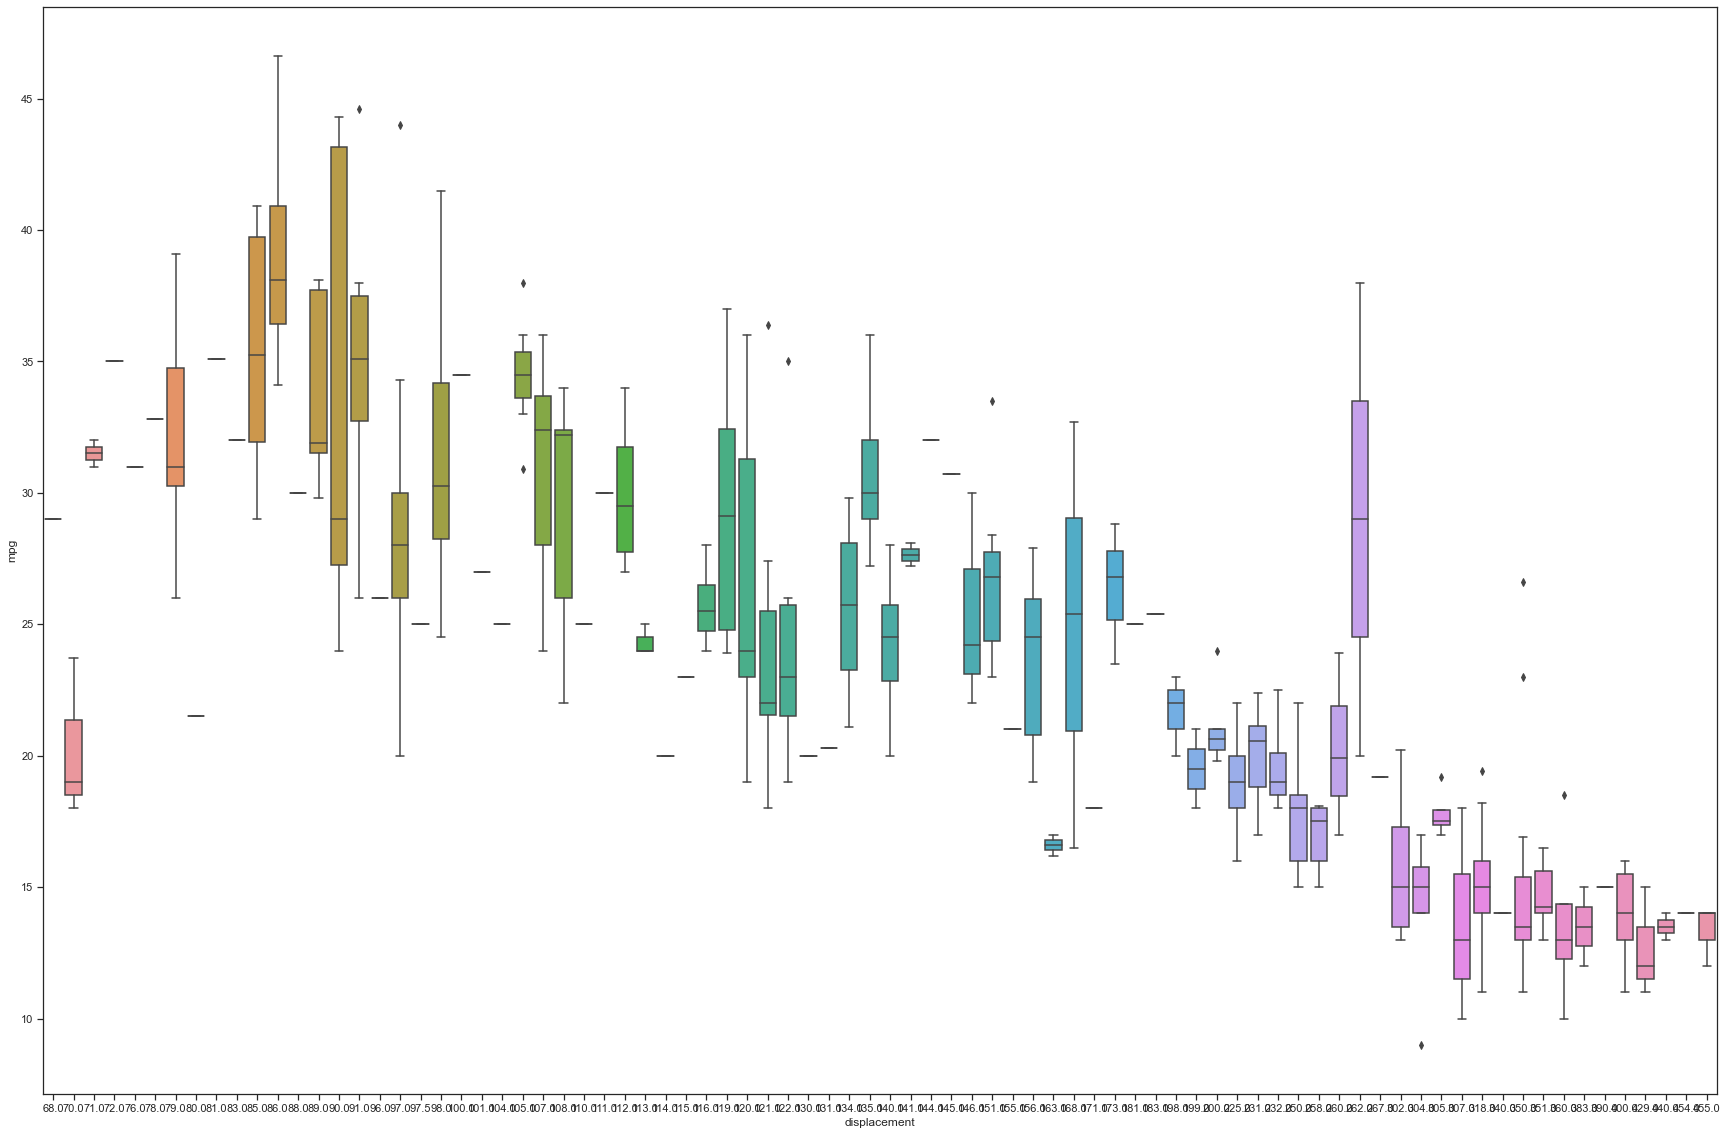

In [36]:
plt.rcParams['figure.figsize']=(30,20)
sns.boxplot(x="displacement",y="mpg",data=AutoMpg)

In [37]:
mpgdf=AutoMpg.drop('car name',axis=1)

In [38]:
mpgdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [39]:
mpgdf['origin']=mpgdf['origin'].replace({1:'america',2:'europe',3:'asia'})

In [40]:
mpgdf.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
76,18.0,4,121.0,112,2933,14.5,72,europe
363,22.4,6,231.0,110,3415,15.8,81,america
9,15.0,8,390.0,190,3850,8.5,70,america
169,20.0,6,232.0,100,2914,16.0,75,america
143,26.0,4,97.0,78,2300,14.5,74,europe
306,28.8,6,173.0,115,2595,11.3,79,america
333,32.7,6,168.0,132,2910,11.4,80,asia
47,19.0,6,250.0,100,3282,15.0,71,america
104,12.0,8,400.0,167,4906,12.5,73,america
46,22.0,4,140.0,72,2408,19.0,71,america


In [41]:
## One hot encoding
mpgdf=pd.get_dummies(mpgdf,columns=['origin'])

In [42]:
mpgdf.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
196,24.5,4,98.0,60,2164,22.1,76,1,0,0
288,18.2,8,318.0,135,3830,15.2,79,1,0,0
239,30.0,4,97.0,67,1985,16.4,77,0,1,0
308,33.5,4,151.0,90,2556,13.2,79,1,0,0
65,14.0,8,351.0,153,4129,13.0,72,1,0,0
37,18.0,6,232.0,100,3288,15.5,71,1,0,0
254,20.2,6,200.0,85,2965,15.8,78,1,0,0
214,13.0,8,302.0,130,3870,15.0,76,1,0,0
218,36.0,4,79.0,58,1825,18.6,77,0,0,1
133,16.0,6,250.0,100,3781,17.0,74,1,0,0


In [46]:
mpgdf['horsepower']=mpgdf['horsepower'].replace("?",np.nan)
mpgdf['horsepower']=mpgdf['horsepower'].astype(float)

In [54]:
X=mpgdf.drop('horsepower',axis=1)
Y=mpgdf['horsepower']

In [62]:
## Split into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [63]:
### Fit the model

model_1=LinearRegression()